## Correlate zonal and meridional wind stress along the Dutch coast with zonal and meridional wind stress over North Atlantic / European region

In this notebook the zonal and meridional wind stress averaged over the tide gauge stations along the Dutch coast is correlated with the zonal and meridional wind stress over a larger region (North-Atlantic / Europe) over different time periods using the ERA5 and 20CRv3 reanalysis data.


The aim of the notebook is to find out whether the wind stress data used for the NearestPoint regression is representative for a larger region

In [1]:
# Import necessary packages
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Github/Thesis-KNMI/Wind_contribution/Analysis/code')

import import_data as imprt
import figures as figs

In [2]:
stations = ['Vlissingen', 'Hoek v. Holland', 'Den Helder', 'Delfzijl', 'Harlingen', 'IJmuiden', 'Average']

### Import data

#### Import local wind stress (per station)

In [3]:
wind_data_era5 = imprt.import_obs_wind_data(model = 'NearestPoint', data_type = 'era5')
wind_data_20cr = imprt.import_obs_wind_data(model = 'NearestPoint', data_type = '20cr')

In [4]:
def create_DataArray(dataframe):
    data_u = []
    data_v = []
    for station in stations:
        data_u.append(dataframe[station, 'u$^2$'])
        data_v.append(dataframe[station, 'v$^2$'])

    u = xr.DataArray(data = data_u, dims = ['station', 'time'], 
                               coords = dict(time = dataframe.index.values, station = stations), name = 'u2')
    
    v = xr.DataArray(data = data_v, dims = ['station', 'time'], 
                               coords = dict(time = dataframe.index.values, station = stations), name = 'v2')
    
    dataarray = xr.merge([u,v])
    
    return dataarray

In [5]:
# Create DataArray
wind_stations_era5 = create_DataArray(wind_data_era5)
wind_stations_20cr = create_DataArray(wind_data_20cr)

#### Import regional wind stress 

In [6]:
path = '/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Data/observations/'
wind_region_era5 = xr.open_dataset(path + f'Wind/wind_annual_era5.nc').rename({'year':'time'})
wind_region_20cr = xr.open_dataset(path + f'Wind/wind_annual_20cr.nc').rename({'year':'time'})

### Correlate and plot data over overlapping period 1950 - 2015

In [33]:
period_start = 1950
period_end = 2015

In [34]:
corr_u2_era5 = xr.corr(wind_region_era5.u2.loc[period_start:period_end,:,:], 
                    wind_stations_era5.u2.loc[:,period_start:period_end], dim='time')
corr_u2_20cr = xr.corr(wind_region_20cr.u2.loc[period_start:period_end,:,:], 
                    wind_stations_20cr.u2.loc[:,period_start:period_end], dim='time')

corr_v2_era5 = xr.corr(wind_region_era5.v2.loc[period_start:period_end,:,:], 
                    wind_stations_era5.v2.loc[:,period_start:period_end], dim='time')
corr_v2_20cr = xr.corr(wind_region_20cr.v2.loc[period_start:period_end,:,:], 
                    wind_stations_20cr.v2.loc[:,period_start:period_end], dim='time')

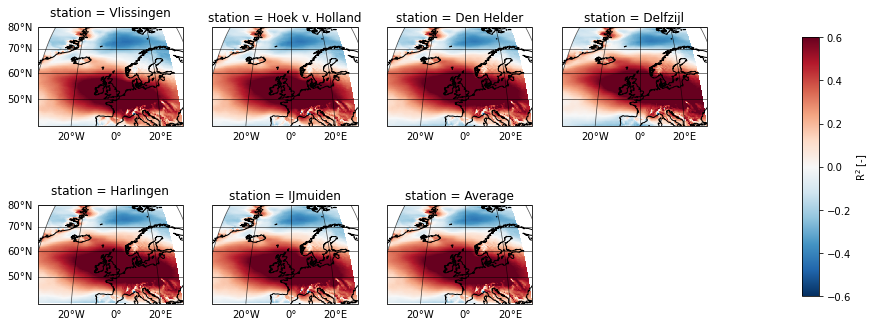

In [36]:
figs.nearestpoint_all_stations_corr(corr_u2_era5, 'era5', period_start, period_end)

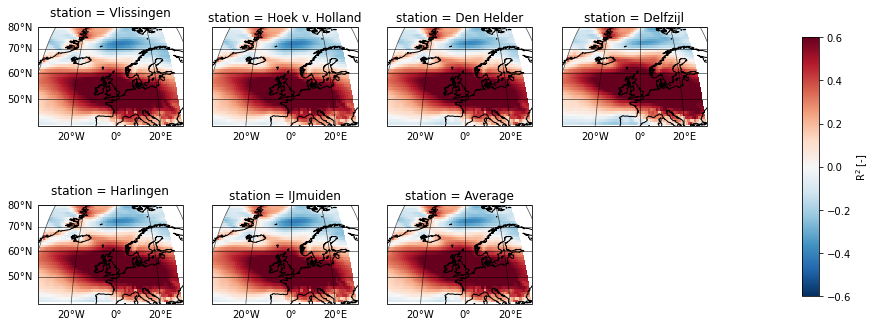

In [10]:
figs.nearestpoint_all_stations_corr(corr_u2_20cr, '20cr', period_start, period_end)

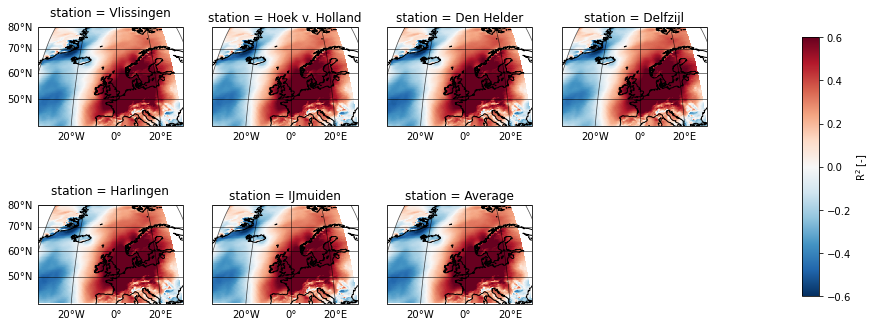

In [11]:
figs.nearestpoint_all_stations_corr(corr_v2_era5, 'era5', period_start, period_end)

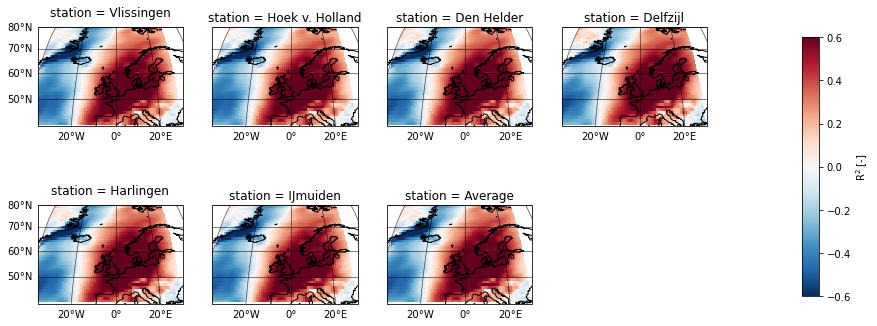

In [12]:
figs.nearestpoint_all_stations_corr(corr_v2_20cr, '20cr', period_start, period_end)

For the overlapping period, the correlations look very much alike for the different stations and reanalysis data products. The wind data along the Dutch coast is very representative for a large region around the Dutch coast: 

u2:  30°W to 30°E and 40°N to 60°N

v2:  20°W to 20°E and 40°N to 80°N.


For the zonal wind stress the high correlation area is zonally stretched and for the meridional wind stress, meridionally stretched.

### Correlate and plot data over the full period ERA5: 1950-2020, 20CRv3: 1836-2015

In [29]:
period_start = 1836
period_end = 2020

In [30]:
corr_u2_era5 = xr.corr(wind_region_era5.u2, 
                    wind_stations_era5.u2, dim='time')
corr_u2_20cr = xr.corr(wind_region_20cr.u2, 
                    wind_stations_20cr.u2, dim='time')

corr_v2_era5 = xr.corr(wind_region_era5.v2, 
                    wind_stations_era5.v2, dim='time')
corr_v2_20cr = xr.corr(wind_region_20cr.v2, 
                    wind_stations_20cr.v2, dim='time')

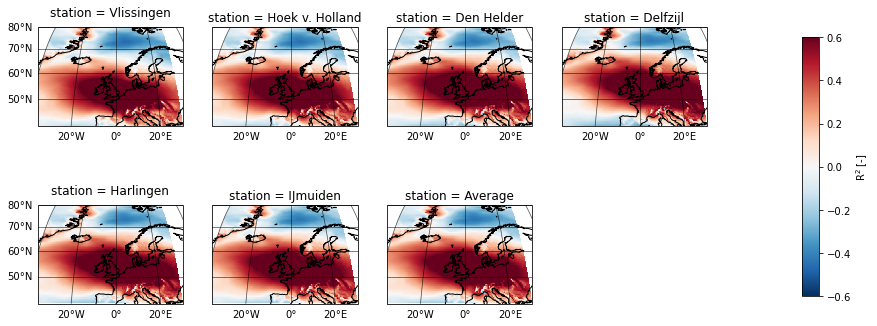

In [32]:
figs.nearestpoint_all_stations_corr(corr_u2_era5, 'era5', period_start, period_end)

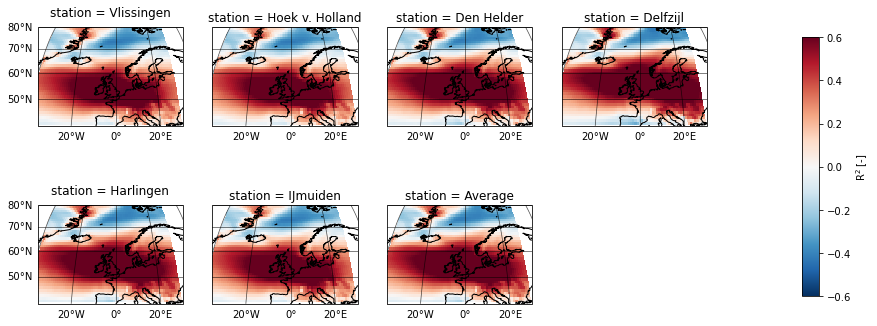

In [16]:
figs.nearestpoint_all_stations_corr(corr_u2_20cr, '20cr', period_start, period_end)

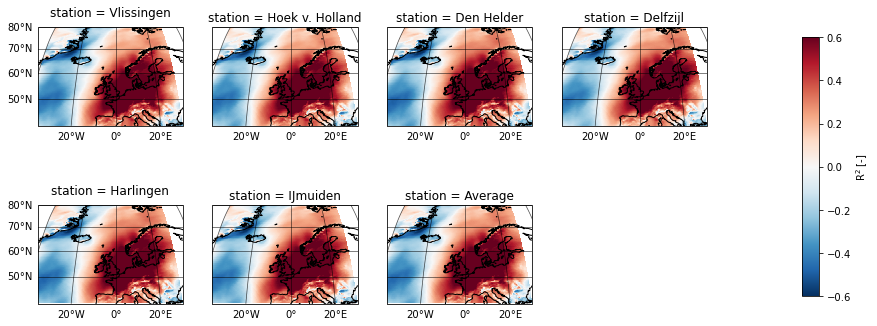

In [17]:
figs.nearestpoint_all_stations_corr(corr_v2_era5, 'era5', period_start, period_end)

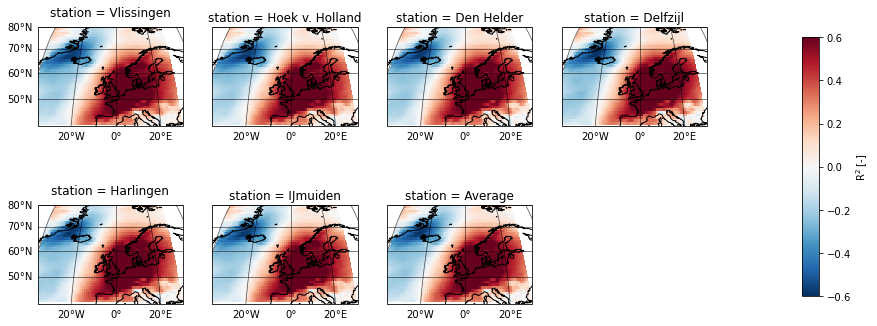

In [18]:
figs.nearestpoint_all_stations_corr(corr_v2_20cr, '20cr', period_start, period_end)

Again, the results for all stations are similar. There is no outstanding difference between the results of the two reanalysis data sets using different time periods. One could even say that the wind stress from 20CRv3 is able to represent an even larger region.

### Correlate and plot ERA5 data over different periods of 40 years

In [19]:
period = 40
period_starts = range(1950, 1981, 10)

In [20]:
corr_u2_era5 = []
corr_v2_era5 = []

for k, year in enumerate(period_starts):
    
    corr_u2_era5.append(xr.corr(wind_region_era5.u2.loc[year:year+period,:,:], 
                                wind_stations_era5.u2.loc[:,year:year+period], dim='time'))
    
    corr_v2_era5.append(xr.corr(wind_region_era5.v2.loc[year:year+period,:,:], 
                                wind_stations_era5.v2.loc[:,year:year+period], dim='time'))



#### Plot correlation

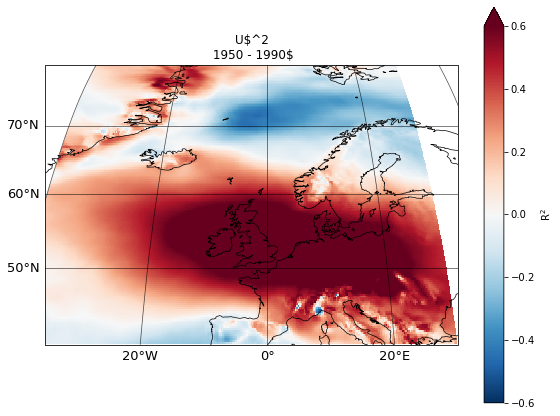

In [27]:
station = 'Average'
fsize = 13

# Plot the map
fig = plt.figure(figsize=(8,16))
ax = plt.axes(projection=ccrs.Robinson())
ax.set_extent([-35, 30, 40, 80], crs=ccrs.PlateCarree())
corr_u2_era5[0].sel(station = station).plot(ax=ax, transform = ccrs.PlateCarree(), vmin = -0.6, vmax = 0.6, cmap = 'RdBu_r', cbar_kwargs = {'shrink':.35, 'label':'R$^2$'})
ax.set_title('U$^2\n 1950 - 1990$')
ax.coastlines(resolution = '50m', linewidth=.7, color = 'k')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels = True, linewidth = .7, color='k', alpha = .7)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': fsize}
gl.ylabel_style = {'size': fsize}
gl.ylocator = mticker.FixedLocator([30, 40, 50, 60, 70])
plt.tight_layout()

plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Wind contribution/observations/NearestPoint/era5/corr_{period_start}_{period_start+40}_{station}.png', bbox_inches='tight')

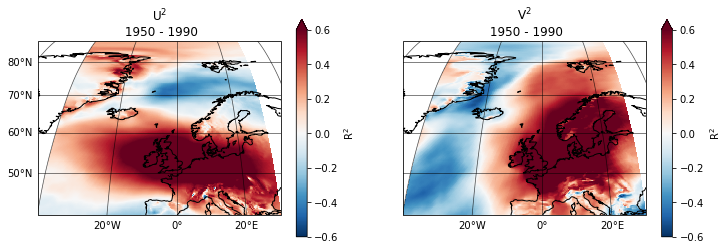

In [22]:
station = 'Average'
fsize = 13

# Plot the maps

fig, axs = plt.subplots(1, 2, figsize=(12, 4), subplot_kw = {'projection' : ccrs.Robinson(0)})

ax = axs[0]
fg = corr_u2_era5[0].sel(station = station).plot(ax=ax, transform = ccrs.PlateCarree(), add_colorbar = True, 
                                                                     vmin = -0.6, vmax = 0.6, cmap = 'RdBu_r',
                                                cbar_kwargs = {'label':'R$^2$'})
gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels = True, linewidth=.7, color='k', alpha = .7)
gl.top_labels = False
gl.right_labels = False
ax.coastlines()
ax.set_title('U$^2$\n 1950 - 1990')

ax = axs[1]
fg = corr_v2_era5[0].sel(station = station).plot(ax=ax, transform = ccrs.PlateCarree(), add_colorbar = True, 
                                                                     vmin = -0.6, vmax = 0.6, cmap = 'RdBu_r',
                                                cbar_kwargs = {'label':'R$^2$'})
gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels = True, linewidth=.7, color='k', alpha = .7)
gl.top_labels = False
gl.right_labels = False
gl.left_labels = False
ax.set_title('V$^2$\n 1950 - 1990')

ax.coastlines()



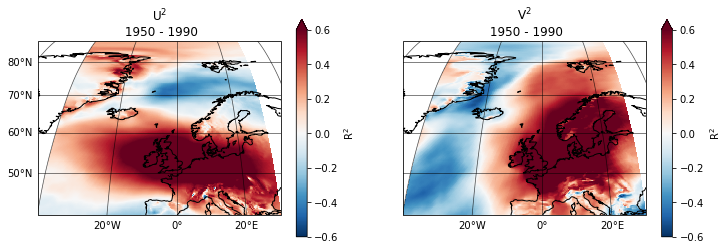

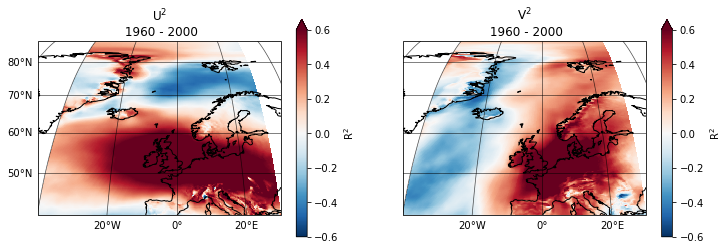

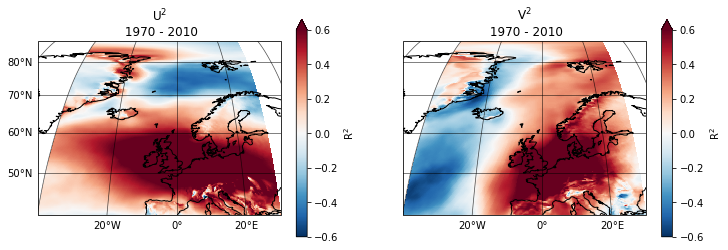

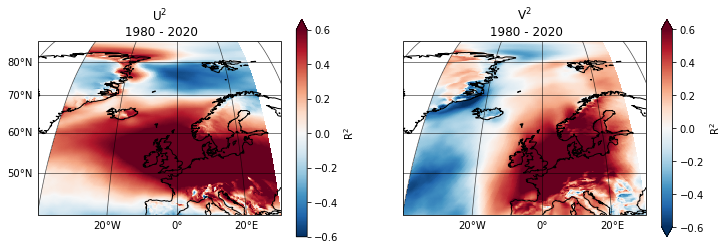

In [23]:
station = 'Average'
fsize = 13

for k, year in enumerate(period_starts):
    # Plot the maps

    fig, axs = plt.subplots(1, 2, figsize=(12, 4), subplot_kw = {'projection' : ccrs.Robinson(0)})

    ax = axs[0]
    fg = corr_u2_era5[k].sel(station = station).plot(ax=ax, transform = ccrs.PlateCarree(), add_colorbar = True, 
                                                                         vmin = -0.6, vmax = 0.6, cmap = 'RdBu_r',
                                                    cbar_kwargs = {'label':'R$^2$'})
    gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels = True, linewidth=.7, color='k', alpha = .7)
    gl.top_labels = False
    gl.right_labels = False
    ax.coastlines()
    ax.set_title(f'U$^2$\n {year} - {year+period}')

    ax = axs[1]
    fg = corr_v2_era5[k].sel(station = station).plot(ax=ax, transform = ccrs.PlateCarree(), add_colorbar = True, 
                                                                         vmin = -0.6, vmax = 0.6, cmap = 'RdBu_r',
                                                    cbar_kwargs = {'label':'R$^2$'})
    gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels = True, linewidth=.7, color='k', alpha = .7)
    gl.top_labels = False
    gl.right_labels = False
    gl.left_labels = False
    ax.set_title(f'V$^2$\n {year} - {year+period}')

    ax.coastlines()




The ERA5 wind stress data along the Dutch coast is very representative for the larger area

### Correlate and plot 20CRv3 data over different periods of 40 years

In [24]:
period = 40
period_starts = range(1840, 1971, 10)

In [25]:
corr_u2_20cr = []
corr_v2_20cr = []

for k, year in enumerate(period_starts):
    
    corr_u2_20cr.append(xr.corr(wind_region_20cr.u2.loc[year:year+period,:,:], 
                                wind_stations_20cr.u2.loc[:,year:year+period], dim='time'))
    
    corr_v2_20cr.append(xr.corr(wind_region_20cr.v2.loc[year:year+period,:,:], 
                                wind_stations_20cr.v2.loc[:,year:year+period], dim='time'))



#### Plot correlation

/Users/iriskeizer/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/iriskeizer/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/Users/iriskeizer/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


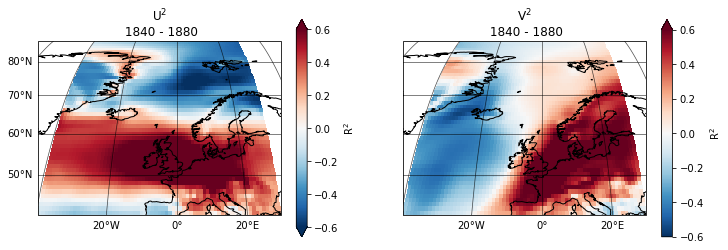

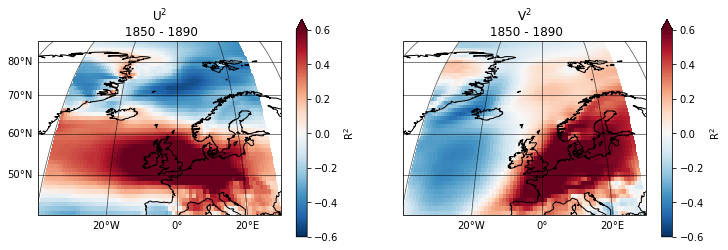

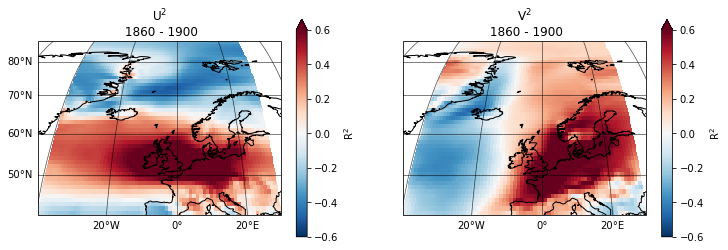

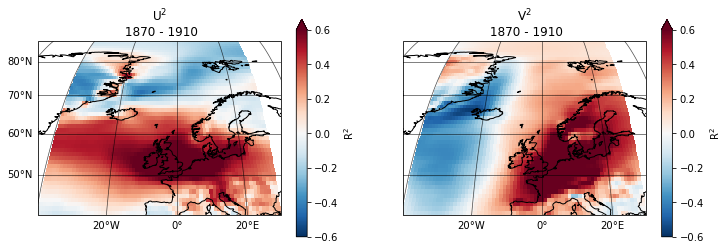

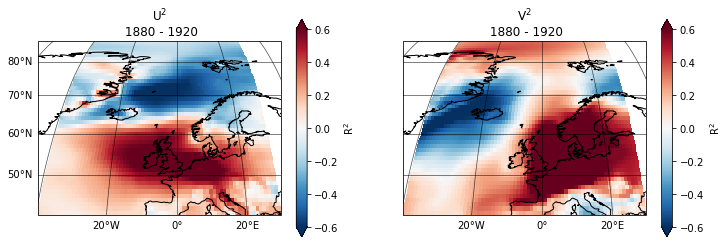

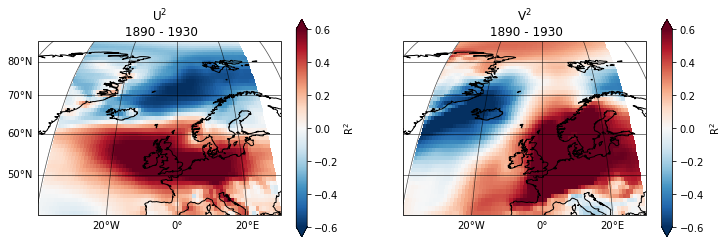

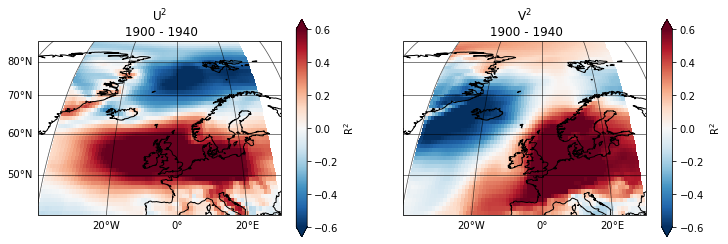

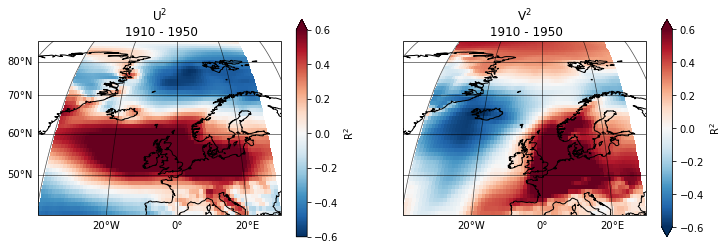

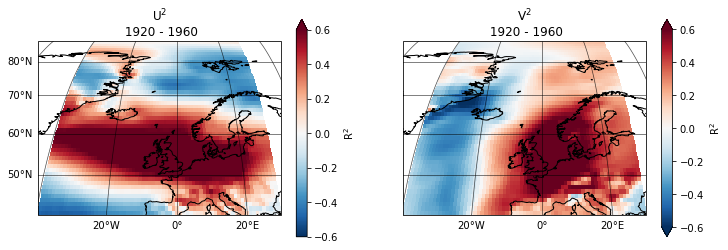

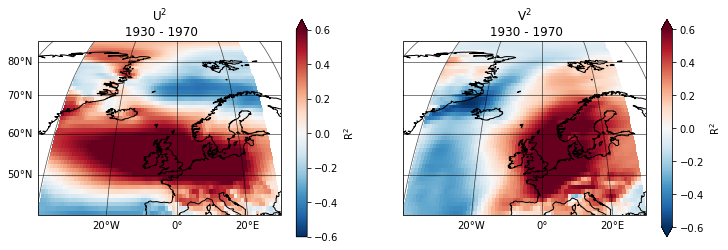

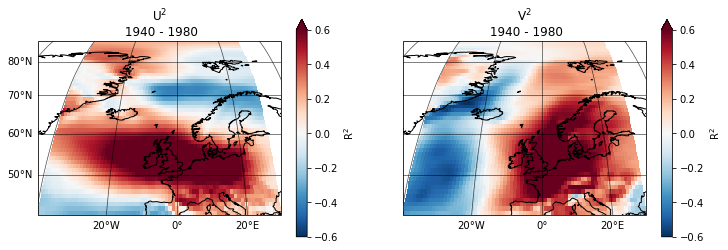

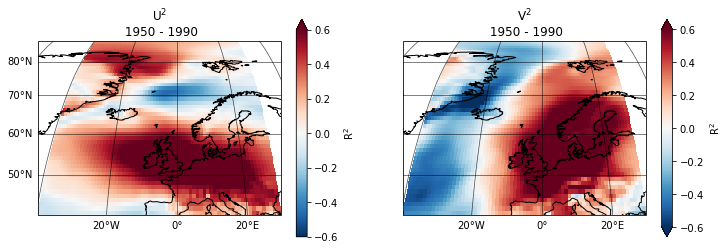

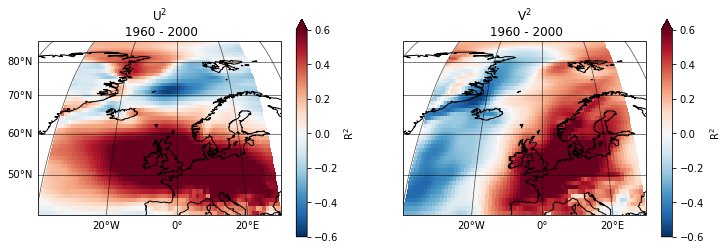

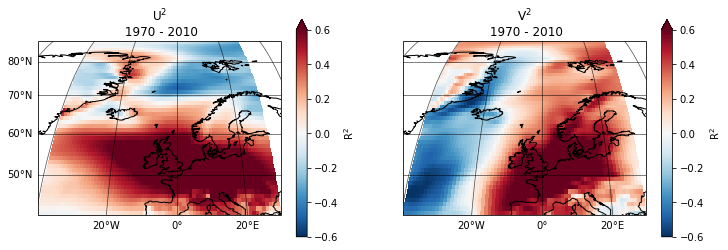

In [26]:
station = 'Average'
fsize = 13

for k, year in enumerate(period_starts):
    # Plot the maps

    fig, axs = plt.subplots(1, 2, figsize=(12, 4), subplot_kw = {'projection' : ccrs.Robinson(0)})

    ax = axs[0]
    fg = corr_u2_20cr[k].sel(station = station).plot(ax=ax, transform = ccrs.PlateCarree(), add_colorbar = True, 
                                                                         vmin = -0.6, vmax = 0.6, cmap = 'RdBu_r',
                                                    cbar_kwargs = {'label':'R$^2$'})
    gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels = True, linewidth=.7, color='k', alpha = .7)
    gl.top_labels = False
    gl.right_labels = False
    ax.coastlines()
    ax.set_title(f'U$^2$\n {year} - {year+period}')

    ax = axs[1]
    fg = corr_v2_20cr[k].sel(station = station).plot(ax=ax, transform = ccrs.PlateCarree(), add_colorbar = True, 
                                                                         vmin = -0.6, vmax = 0.6, cmap = 'RdBu_r',
                                                    cbar_kwargs = {'label':'R$^2$'})
    gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels = True, linewidth=.7, color='k', alpha = .7)
    gl.top_labels = False
    gl.right_labels = False
    gl.left_labels = False
    ax.set_title(f'V$^2$\n {year} - {year+period}')

    ax.coastlines()




For the 20CRv3 data there are some periods that have a smaller region of high correlation:

1850 - 1890

1860 - 1900

1880 - 1920

1890 - 1930

1900 - 1940

I'm not sure what to conclude from this analysis. It is not an imediate reason to say the NearestPoint model is less valid